EDA 탐색적 data 분석

In [2]:
import pandas as pd
t_data = pd.read_table('ratings_train.txt')[['document','label']]
tt_data = pd.read_table('ratings_test.txt')[['document','label']]

data의 수량 및 형상 확인

In [6]:
t_data.shape, tt_data.shape

((150000, 2), (50000, 2))

In [9]:
import numpy as np
#데이터 중복 확인
t_data['document'].nunique() #데이터프레임에 있는 메서드
#총 데이터 수보다 적다. -> 중복된 데이터가 있다.

146182

In [10]:
#중복 샘플 제거. 근데 지워낸 빈 인스턴스도 추가된다.
t_data.drop_duplicates(subset=['document'], inplace=True)

In [11]:
t_data.shape

(146183, 2)

In [12]:
t_data

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...
149995,인간이 문제지.. 소는 뭔죄인가..,0
149996,평점이 너무 낮아서...,1
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


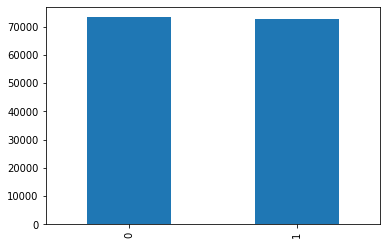

In [13]:
#정답 분포 시각화
t_data['label'].value_counts().plot(kind='bar')

In [14]:
# 각 레이블 개수
t_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,73342
1,1,72841


In [15]:
#리뷰 null 확인
t_data.isnull().values.any()

True

In [16]:
#null 값 위치 확인
t_data.isnull().sum()

document    1
label       0
dtype: int64

In [17]:
#null 인덱스 확인
t_data.loc[t_data.document.isnull()]

,document,label
25857,NaN,1


In [18]:
t_data=t_data.dropna(how='any')
t_data.isnull().values.any()

False

In [19]:
len(t_data)

146182

In [20]:
#한국어만 남기기
t_data['document'] = t_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
#시작 문자 공백 제거
t_data['document'] = t_data['document'].str.replace('^ +', '')
t_data['document'].replace('', np.nan, inplace=True)
#리뷰 null 확인
t_data.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

document    789
label         0
dtype: int64

In [21]:
t_data=t_data.dropna(how='any')
len(t_data)

145393

In [22]:
#한국어 기본 전처리
tt_data.drop_duplicates(subset=['document'], inplace=True)
tt_data['document'] = tt_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
tt_data['document'] = tt_data['document'].str.replace('^ +', '')
tt_data['document'].replace('', np.nan, inplace=True)
tt_data=tt_data.dropna(how='any')
len(tt_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


48852

In [23]:
t_data.shape, tt_data.shape

((145393, 2), (48852, 2))

토큰화

In [24]:
#불용어
stopwords=['의','기','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [25]:
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 28.6 MB/s 


In [28]:
from konlpy.tag import Okt
tk = Okt()
X_data = []
for i in t_data['document']:
    t_x = tk.morphs(i, stem=True) #어간만 뽑음
    t_x = [w for w in t_x if w not in stopwords]
    X_data.append(t_x)

테스트 데이터 토큰

In [ ]:
from konlpy.tag import Okt
tk = Okt()
t_X_data = []
for i in tt_data['document']:
    tt_x = tk.morphs(i, stem=True) #어간만 뽑음
    tt_x = [w for w in tt_x if w not in stopwords]
    t_X_data.append(tt_x)

In [30]:
X_data[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

정수 인코딩

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
tkr = Tokenizer()
tkr.fit_on_texts(X_data)

In [33]:
#등장 빈도수가 3 미만인 data 및 분포 확인
threshold = 3 #등장 빈도수의 기준
total_cnt = len(tkr.word_index) #단어의 종류 수
r_cnt=0 #등장 빈도수가 기준보다 작은 단어 수 카운트
total_fr = 0 #전체의 단어 빈도수 총합
rl_fr = 0 #등장 빈도수가 기준보다 작은 단어의 등장 빈도수 총합

In [ ]:
for k,v in tkr.word_counts.items():
    total_fr += v
    if (v<threshold):
        r_cnt += 1
        rl_fr += v